<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [7]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.5.0


## 2. Setting Options

In [8]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [9]:
path = '/content/drive/MyDrive/AIML files /Statistical NLP/Lab/'

In [10]:
product_df = pd.read_csv(path + 'product_data.csv')

In [11]:
product_df.shape

(720, 10)

In [12]:
product_df.sample(2)
# these are deatils about the product from the ecommerce site

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
705,B07Z41LHPB,Samsung,Samsung Galaxy Note 10+ Plus 256GB GSM Unlocke...,https://www.amazon.com/Samsung-Galaxy-Unlocked...,https://m.media-amazon.com/images/I/618bEcxx-a...,2.8000000,https://www.amazon.com/product-reviews/B07Z41LHPB,11,659.0000000,0.0000000
98,B00X2ZQ5RM,Samsung,Samsung Galaxy S6 32GB G920A AT&T Unlocked - G...,https://www.amazon.com/Samsung-Galaxy-32GB-G92...,https://m.media-amazon.com/images/I/91JHyj8K0F...,2.8000000,https://www.amazon.com/product-reviews/B00X2ZQ5RM,134,0.0000000,0.0000000


In [13]:
review_df = pd.read_csv(path + 'reviews.csv')
review_df.shape

(67986, 8)

In [14]:
review_df.head(2)
# these are the 67986 user reviews given to 720 products

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000


## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [15]:
product_dff = product_df.drop(['url', 'image', 'reviewUrl'], axis=1)
product_dff.shape

(720, 7)

### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [16]:
product_dff.describe()
# original price seems to have outlier data & in current state is not useful to us
# The mini value of price being zero is also an outlier 

,rating,totalReviews,price,originalPrice
count,720.0000000,720.0000000,720.0000000,720.0000000
mean,3.7137500,105.6791667,234.9489306,63.6907778
std,0.7160138,167.6011014,200.0084407,172.4053696
min,1.0000000,1.0000000,0.0000000,0.0000000
25%,3.3000000,7.0000000,97.5125000,0.0000000
50%,3.8000000,32.0000000,188.9750000,0.0000000
75%,4.1000000,122.2500000,336.7250000,0.0000000
max,5.0000000,983.0000000,999.9900000,999.9900000


In [18]:
product_dff[product_dff.price ==0].count()
# these products cannot have zero price

asin             124
brand            123
title            124
rating           124
totalReviews     124
price            124
originalPrice    124
dtype: int64

In [19]:
product_dff.describe(include='object')
# categorical cloumns analysis tells us that we have 10 brands with 720 products 
# the most popular brand being samsung

,asin,brand,title
count,720,716,720
unique,720,10,718
top,B000SKTZ0S,Samsung,Google Pixel 2 XL 128GB Unlocked GSM/CDMA 4G L...
freq,1,346,2


In [20]:
review_df.describe()

,rating,helpfulVotes
count,67986.0000000,27215.0000000
mean,3.8079163,8.2296895
std,1.5829058,31.9548772
min,1.0000000,1.0000000
25%,3.0000000,1.0000000
50%,5.0000000,2.0000000
75%,5.0000000,5.0000000
max,5.0000000,990.0000000


In [21]:
review_df[review_df['helpfulVotes']==990]
# this can help us identify why a particular product has drawn so much attention 

,asin,name,rating,date,verified,title,body,helpfulVotes
24467,B01GXAT0CE,Jake,1,"May 1, 2017",True,It seems like it has been stolen,"The product came in a beaten up box, came lock...",990.0000000


In [22]:
review_df.describe(include='object')

,asin,name,date,title,body
count,67986,67984,67986,67972,67965
unique,720,47323,2983,41489,59811
top,B00F2SKPIM,Amazon Customer,"December 11, 2019",Five Stars,Good
freq,981,6507,234,6043,303


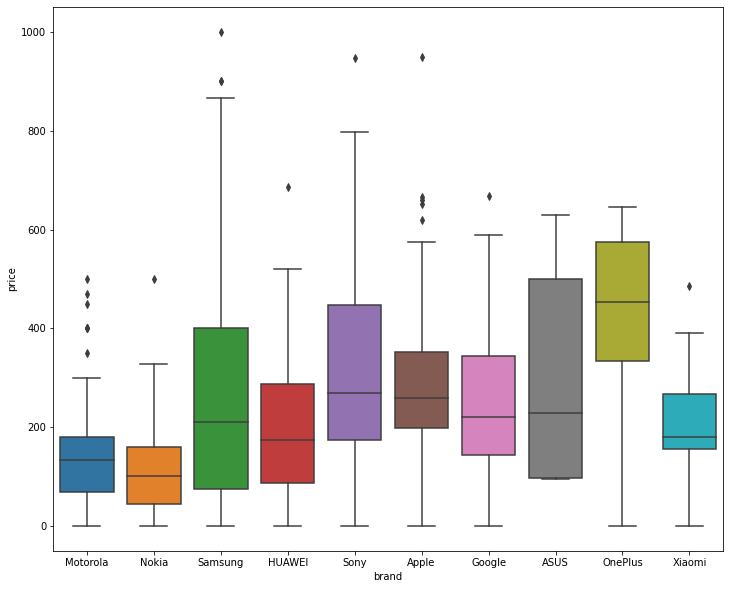

In [31]:
sns.boxplot(x = product_dff['brand'], y = product_dff['price'])

### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

In [29]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 12,10

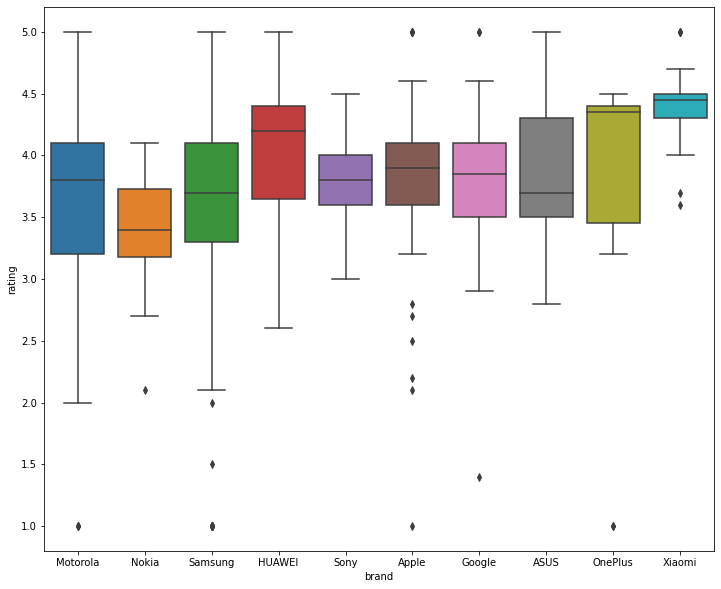

In [30]:
sns.boxplot(x = product_dff['brand'], y = product_dff['rating'])

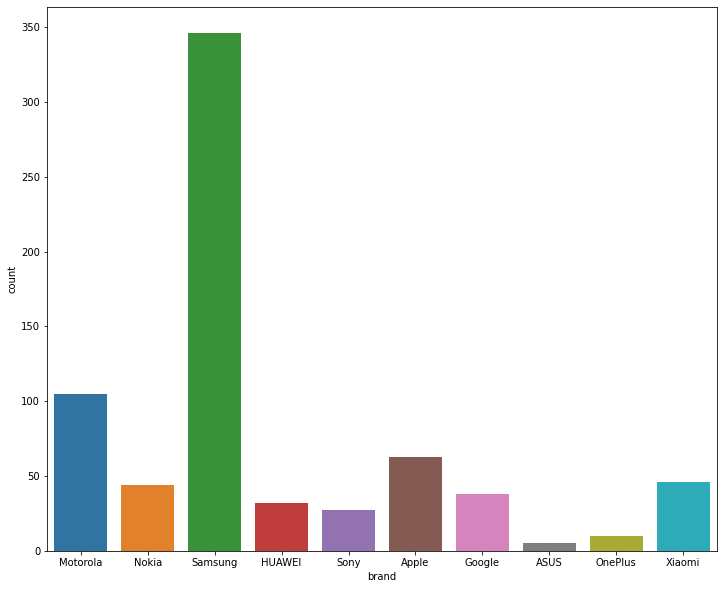

In [36]:
sns.countplot(data = product_dff , x = product_dff['brand'])

### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

In [ ]:
product_dff

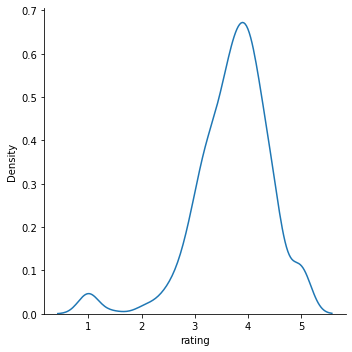

In [37]:
sns.displot(data= product_df,x='rating', kind='kde')


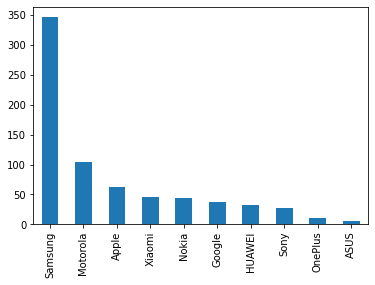

In [21]:
product_dff['brand'].value_counts().plot(kind='bar')

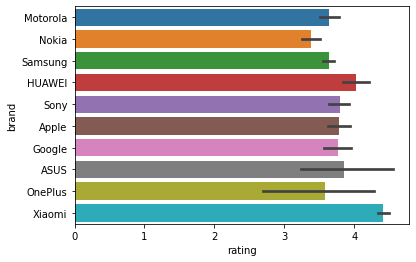

In [19]:
sns.barplot(data=product_dff,x=product_dff.rating,y='brand')


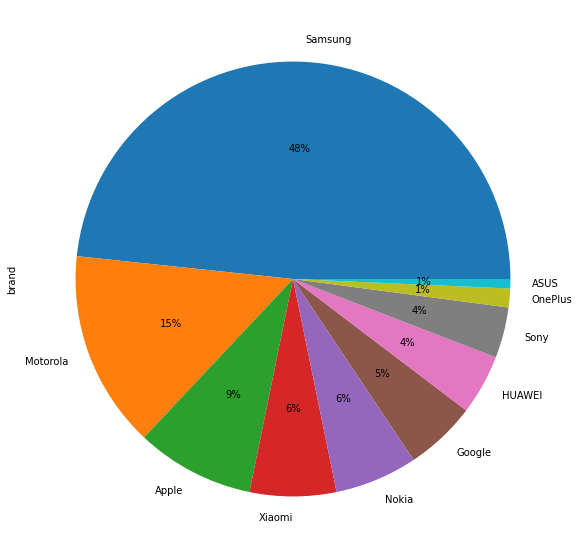

In [22]:
product_dff['brand'].value_counts().plot(kind='pie', autopct = '%1.0f%%', figsize=(12,10))

### 4.5 Display average rating per brand

In [40]:
# Calculating average rating per brand

rating_per_brand = product_dff.groupby(by='brand')['rating'].mean().sort_values(ascending=False)
rating_per_brand


brand
Xiaomi     4.4152174
HUAWEI     4.0218750
ASUS       3.8600000
Sony       3.7888889
Apple      3.7825397
Google     3.7710526
Motorola   3.6438095
Samsung    3.6326590
OnePlus    3.5800000
Nokia      3.3863636
Name: rating, dtype: float64

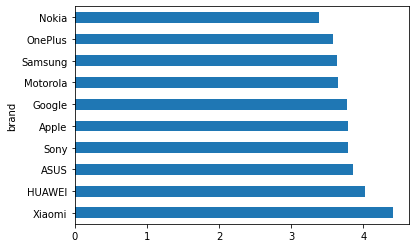

In [25]:
product_dff.groupby(by='brand')['rating'].mean().sort_values(ascending=False).plot(kind='barh')
# xiomi has the highest rating but its sample size is also small

### 4.6 Display average price per brand

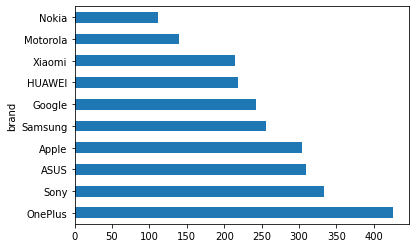

In [26]:
product_dff.groupby(by='brand')['price'].mean().sort_values(ascending=False).plot(kind='barh')

### 4.7 Display average 'totalReviews' per brand

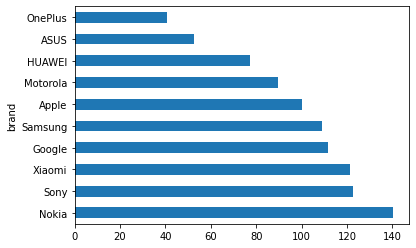

In [27]:
product_dff.groupby(by='brand')['totalReviews'].mean().sort_values(ascending=False).plot(kind='barh')

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [29]:
review_df.head(2)

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000


In [41]:
product_dff.head(2)

,asin,brand,title,rating,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
1,B0009N5L7K,Motorola,Motorola I265 phone,3.0000000,7,49.9500000,0.0000000


In [28]:
review_df.shape

(67986, 8)

In [30]:
df = pd.merge(review_df, product_dff, how= 'left', left_on='asin', right_on='asin')
df.shape
# here the method os merge is left where user review dataset becomes X & product dataset becomes y
# the order of specifying dataframe id very important 

(67986, 14)

In [31]:
df.head(2)

,asin,name,rating_x,date,verified,title_x,body,helpfulVotes,brand,title_y,rating_y,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000


### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [32]:
df.rename(columns={"rating_x": "user_rating", "title_x": "review_title","title_y": "item_title","rating_y":"overall_rating"},inplace=True)
df.head(2)

,asin,name,user_rating,date,verified,review_title,body,helpfulVotes,brand,item_title,overall_rating,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000


### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [35]:
df['verified'].value_counts()

True     61225
False     6761
Name: verified, dtype: int64

In [34]:
dff = df[df.verified==True]
dff.shape


(61225, 14)

### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

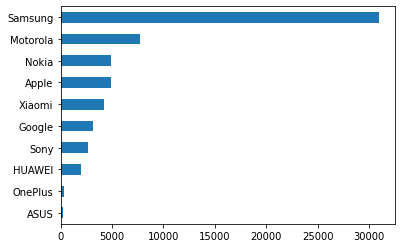

In [37]:
dff['brand'].value_counts().sort_values().plot(kind='barh')

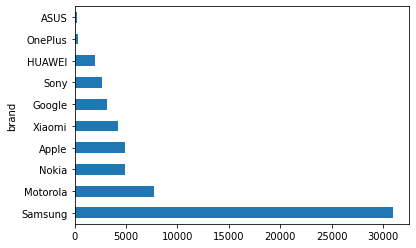

In [38]:
dff.groupby(by='brand')['totalReviews'].count().sort_values(ascending=False).plot(kind='barh')

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [39]:
df.columns

Index(['asin', 'name', 'user_rating', 'date', 'verified', 'review_title',
       'body', 'helpfulVotes', 'brand', 'item_title', 'overall_rating',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

In [40]:
df_final = dff[['brand','body','price','user_rating','review_title']]
df_final.head(2)


,brand,body,price,user_rating,review_title
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked


### 4.13 Perform univariate analysis. Check distribution of price, user_rating

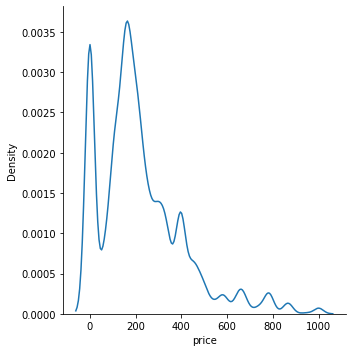

In [41]:
sns.displot(df_final['price'], kind='kde')

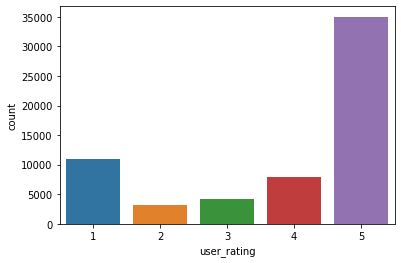

In [42]:
sns.countplot(df_final['user_rating'])

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (negative) if the user_Rating <= 3

In [44]:
df_final['sentiment'] = df_final['user_rating'].apply(lambda x:1 if x>3 else 0)

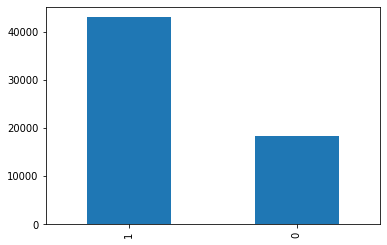

In [45]:
df_final['sentiment'].value_counts().plot(kind='bar')

### 4.15 Check frequency distribution of the 'sentiment'

In [48]:
pd.crosstab(df_final['brand'], df_final['sentiment'])

sentiment,0,1
brand,,
ASUS,69,137
Apple,1627,3249
Google,1011,2152
HUAWEI,366,1653
Motorola,2220,5494
Nokia,1904,2974
OnePlus,45,259
Samsung,9499,21521
Sony,879,1812


### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

In [47]:
pd.crosstab(df_final['brand'], df_final['sentiment']).apply(lambda r: r/r.sum(), axis=1)

sentiment,0,1
brand,,
ASUS,0.3349515,0.6650485
Apple,0.3336751,0.6663249
Google,0.3196333,0.6803667
HUAWEI,0.1812779,0.8187221
Motorola,0.2877884,0.7122116
Nokia,0.3903239,0.6096761
OnePlus,0.1480263,0.8519737
Samsung,0.3062218,0.6937782
Sony,0.3266444,0.6733556


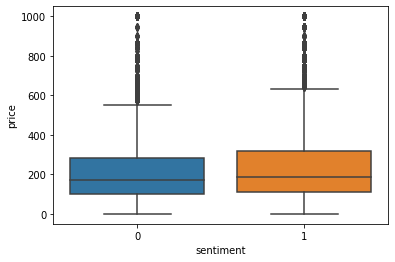

In [46]:
sns.boxplot(y= df_final['price'], x= df_final['sentiment'])

## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will peform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [49]:
df_final.head(2)

,brand,body,price,user_rating,review_title,sentiment
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone,0
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked,0


In [50]:
df_final.iloc[0,1]

"DON'T BUY OUT OF SERVICE"

In [51]:
df_final.loc[14,'body']

"DON'T BUY OUT OF SERVICE"

In [53]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61225 entries, 14 to 67984
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         61078 non-null  object 
 1   body          61207 non-null  object 
 2   price         61225 non-null  float64
 3   user_rating   61225 non-null  int64  
 4   review_title  61211 non-null  object 
 5   sentiment     61225 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 5.8+ MB


In [54]:
df_final['keywords']= df_final['body'].str.lower() # convert into string from object & then lower text
df_final['keywords'].head()

14                             don't buy out of service
17    1 star because the phones locked so i have to ...
18    the product has been very good. i had used thi...
21    i bought this phone to replace an lg phone tha...
22    i purchased this phone for my at&t phone repla...
Name: keywords, dtype: object

### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [55]:
df_final['keywords'] = df_final['keywords'].str.replace('[^\w\s]','')
 # this pattern will be replaced with nothing - except spaces, alphabet & numbers everything replaced
# regex documentation 
# \w removes everything except [A-Za-z0-9_] and \s retains white spaces

Alternative way


import string
df_final['keywords'] = df_final['keywords'].str.translate(str.maketrans('', '', string.punctuation))


In [57]:
df_final['keywords'].head()

14                              dont buy out of service
17    1 star because the phones locked so i have to ...
18    the product has been very good i had used this...
21    i bought this phone to replace an lg phone tha...
22    i purchased this phone for my att phone replac...
Name: keywords, dtype: object

### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [58]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [59]:
stop_words = set(stopwords.words('english')) # set coverts into set
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [60]:
df_final.shape

(61225, 7)

In [61]:
df_final['keywords'].head(2)


14                              dont buy out of service
17    1 star because the phones locked so i have to ...
Name: keywords, dtype: object

In [ ]:
df_final['keywords'] = df_final['keywords'].astype('str')

In [63]:
df_final['keywords'] = df_final['keywords'].apply(lambda words: ' '.join(w for w in words.split() if w not in stop_words))
df_final['keywords'].head()


14                                     dont buy service
17      1 star phones locked pay additional fees unlock
18    product good used cell phone one projects work...
21    bought phone replace lg phone didnt like expec...
22    purchased phone att phone replacement even tho...
Name: keywords, dtype: object

Alternative method

def remove_stopwords(text):
    return [w for w in words if w not in stop_words and not w.isdigit()]

In [64]:
df_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 61225 entries, 14 to 67984
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         61078 non-null  object 
 1   body          61207 non-null  object 
 2   price         61225 non-null  float64
 3   user_rating   61225 non-null  int64  
 4   review_title  61211 non-null  object 
 5   sentiment     61225 non-null  int64  
 6   keywords      61225 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.2+ MB


### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [65]:
# convert into root words
# lemme - converts the token into dictionary word (token valid) - more time
# stemming - faster - could be a random word
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

Concept of Tokenizer

Tokenize a string on whitespace (space, tab, newline).
In general, users should use the string split() method instead.

>>> from nltk.tokenize import WhitespaceTokenizer
>>> s = "Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.\n\nThanks."
>>> WhitespaceTokenizer().tokenize(s)
['Good', 'muffins', 'cost', '$3.88', 'in', 'New', 'York.',
'Please', 'buy', 'me', 'two', 'of', 'them.', 'Thanks.']

In [66]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [67]:
w_tokenizer.tokenize('bought phone replace lg phone didnt like')

['bought', 'phone', 'replace', 'lg', 'phone', 'didnt', 'like']

In [71]:
lemmatizer.lemmatize('freezes')

'freeze'

In [69]:
# text will first be tokeniser - white space tokeniser doing that
# lemmertizer taking each token & converting into root token
def lemmatize_text(text):
  return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


In [70]:
df_final['lemm'] = df_final['keywords'].apply(lemmatize_text)
df_final['lemm'].head(2)


14                                 [dont, buy, service]
17    [1, star, phone, locked, pay, additional, fee,...
Name: lemm, dtype: object

In [ ]:
# checking

from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()
  
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))
  
# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos ="a"))

### 5.5 Check most common and rare words in the processed text
- We can also write a function to check word frequency of the text (Optional)

create 2 df for positive & negative reviews

df_pos = df_final[df_final["sentiment"]==1]


In [81]:
from collections import Counter
cnt = Counter()
for text in df_final["keywords"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

# for entire df - can run in only negative comments
# counter will keep adding the words if repeated or new word 
# stores word & count 
# phone is not adding any value
# this helps us understand the stop words
# important features can be identified 

[('phone', 74458),
 ('great', 16986),
 ('good', 13415),
 ('battery', 11641),
 ('screen', 10377),
 ('like', 10360),
 ('one', 10035),
 ('new', 9498),
 ('use', 8755),
 ('get', 7566)]

In [83]:
cnt.most_common()[-1]

('prontoen', 1)

In [85]:
cnt.most_common()[:-10:-1]

[('prontoen', 1),
 ('500500', 1),
 ('sd730g', 1),
 ('nois', 1),
 ('tomuch', 1),
 ('instructivo', 1),
 ('confirmen', 1),
 ('intrligente', 1),
 ('haxe', 1)]

In [82]:
rare_words = 10
cnt.most_common()[:-rare_words-1:-1]
# list of tuples - counter
# last 10 ones - 

[('prontoen', 1),
 ('500500', 1),
 ('sd730g', 1),
 ('nois', 1),
 ('tomuch', 1),
 ('instructivo', 1),
 ('confirmen', 1),
 ('intrligente', 1),
 ('haxe', 1),
 ('4ever', 1)]

### 5.6 Initialize tf-idf vectorizer and transform the preprocessed body text

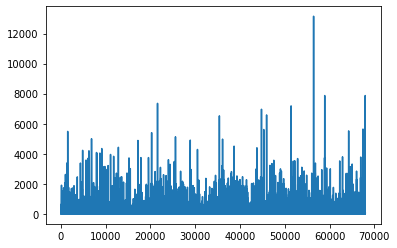

In [86]:
df_final["len"] =df_final["keywords"].str.len() # each alphabet & spaces counted
df_final["len"].plot()


In [72]:
# Initialize TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
# max features


In [73]:
# Initialize TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer1 = TfidfVectorizer(ngram_range=(2,2)) # new parameter


In [74]:
tfidf = tfidf_vectorizer.fit_transform(df_final['keywords']) # expects data in text format - raw data

In [75]:
tfidf.shape

(61225, 38370)

### 5.7 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [76]:
y = df_final['sentiment']

### 5.9 Split the data into Train & Test Sets

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(tfidf, y, random_state = 50, stratify=y, test_size=0.3)


## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf_clf1 = RandomForestClassifier()
rf_clf1.fit(X_train, y1_train)
print(rf_clf1.score(X_train, y1_train))
print(rf_clf1.score(X_test, y1_test))


0.9958699862332875
0.8882839721254355


In [79]:
from sklearn.metrics import confusion_matrix
y1_pred = rf_clf1.predict(X_train)
confusion_matrix(y1_train, y1_pred)


array([[12639,   161],
       [   16, 30041]])

In [80]:
from sklearn.metrics import confusion_matrix
y1_pred = rf_clf1.predict(X_test)
confusion_matrix(y1_test, y1_pred)


array([[ 4072,  1414],
       [  638, 12244]])

## 7. Write your conclusion

In [ ]:
# we have achieved a good accuracy but the model seems to an overfit model
# we can resuce the dimensions of the tfidf vector by using different hyperparameters to fine tune our model

##. 8. Further Explore
### 8.0 Merge all independent features and the below text preprocessing steps
### 8.1 Check rare words and drop them
### 8.2 Remove emoticon/emojis
### 8.3 Try different vectorizer for vectorization
### 8.4 Use embeddings
### 8.5 Use NN based models

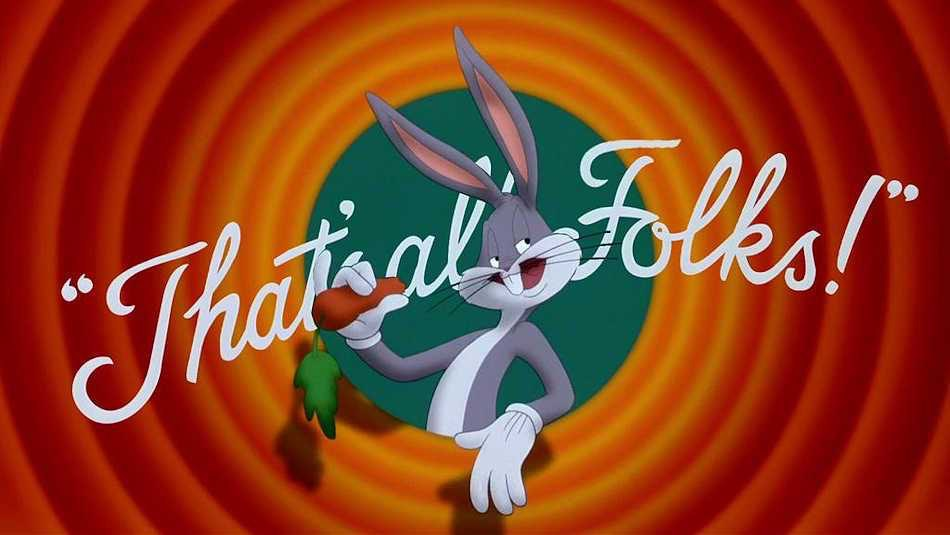